<a href="https://colab.research.google.com/github/DanaPing/Portfolio/blob/main/amazon_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kora -q
'''load packages'''
import requests
from bs4 import BeautifulSoup
from kora.selenium import wd

     |████████████████████████████████| 57 kB 3.7 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 


In [2]:
# Establish Session
url = 'https://www.amazon.com.au'
wd.get(url)

What do you want to search for?ultrawide monitor


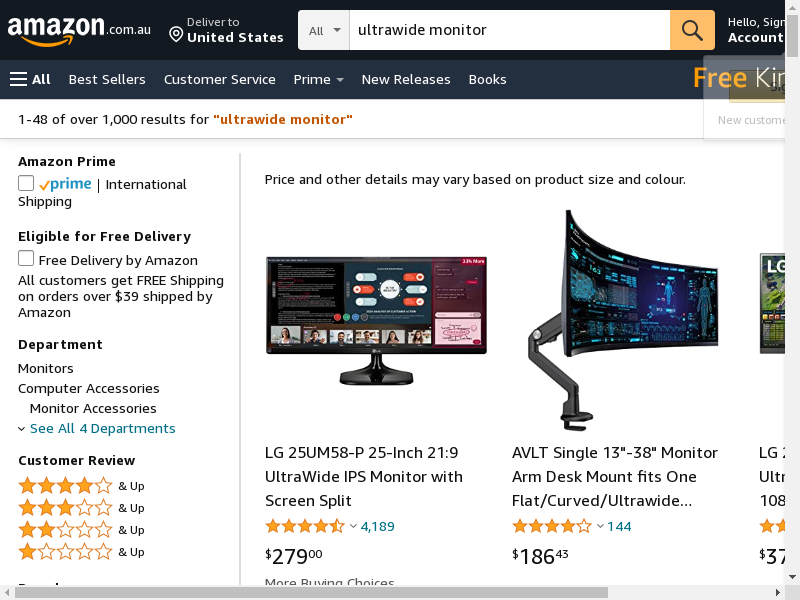

In [3]:
#work out the URL pattern
template = "https://www.amazon.com.au/s?k={}&ref=nb_sb_noss_2"

#search_term = "ultrawide monitor"
search_term = input("What do you want to search for?")
search_term = search_term.replace(' ', '+')

url = template.format(search_term)
wd.get(url)
wd


In [4]:
#create a funciton of the things that is working 
def get_url(search_term):
  template = "https://www.amazon.com.au/s?k={}&ref=nb_sb_noss_2"
  search_term = search_term.replace(' ', '+')
  url = template.format(search_term)
  return url

In [5]:
search_term = input("what do you want to search for?")
url = get_url(search_term)
wd.get(url)

what do you want to search for?ultrawide monitor


In [6]:
soup = BeautifulSoup(wd.page_source, 'html.parser')
soup

<html class=" a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-transform3d a-touch-scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition a-ember" data-19ax5a9jf="dingo" data-aui-build-date="3.21.7-2021-10-19" lang="en-au"><!-- sp:feature:head-start --><head><script async="" crossorigin="anonymous" src="https://c.amazon-adsystem.com/bao-csm/forensics/a9-tq-forensics-incremental.min.js"></script><script async="" crossorigin="anonymous" src="https://images-fe.ssl-images-amazon.com/images/I/31YXrY93hfL.js"></script><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://i

# Extract the Collection

In [7]:
result = soup.find_all('div', {'data-component-type': 's-search-result'})
result[0]

<div class="sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20" data-asin="B01BV1XB2K" data-component-id="54" data-component-type="s-search-result" data-index="1" data-uuid="2bf0574c-4cfa-48f6-8210-0c0a09f13fd4"><div class="sg-col-inner">
<span cel_widget_id="MAIN-SEARCH_RESULTS-1" class="celwidget slot=MAIN template=SEARCH_RESULTS widgetId=search-results_1" data-csa-c-id="oih61q-k6hyno-5jfiez-t43es8">
<div class="s-expand-height s-include-content-margin s-latency-cf-section s-border-bottom"><div class="a-section a-spacing-medium"><div class="a-section a-spacing-none s-grid-status-badge-container s-expand-height s-padding-micro"></div><span class="rush-component" data-component-id="1" data-component-type="s-product-image"><a class="a-link-normal s-no-outline" href="/LG-25UM58-P-25-Inch-21-UltraWide/dp/B01BV1XB2K/ref=sr_1_1?dchild=1&amp;keywords=ultrawide+monitor&amp;qid=1634813340&amp;sr=8-1"><div class="a-section aok-relative s-image-square

In [8]:
result[0].h2.a.text

'LG 25UM58-P 25-Inch 21:9 UltraWide IPS Monitor with Screen Split '

In [9]:
def extract_description(item):
  description = item.h2.a.text
  return description

In [10]:
extract_description(result[11])

'VIVO Heavy Duty Single 17 to 35 inch Monitor Pneumatic Spring Arm Stand, Aluminum Clamp-on Desk Mount, Fits 1 Screen, Max VESA 100x100, Black, STAND-V100G '

# Prototype the record

In [11]:
item = result[1]
price_parent = item.find('span', 'a-price')
price = price_parent.find('span', 'a-offscreen')
price.text


'$186.43'

In [12]:
def extract_price(item):
  try:
    price_parent = item.find('span', 'a-price')
    price = price_parent.find('span', 'a-offscreen')
    price = price.text
  except AttributeError:
    price = ''
  return price

In [13]:
extract_price(result[1])

'$186.43'

In [14]:
def extract_record(item):
  return{
      'description': extract_description(item),
      'price': extract_price(item)
  }

In [15]:
extract_record(result[1])

{'description': 'AVLT Single 13"-38" Monitor Arm Desk Mount fits One Flat/Curved/Ultrawide Monitor Full Motion Height Swivel Tilt Rotation Adjustable Monitor Arm - VESA/C-Clamp/Cable Management ',
 'price': '$186.43'}

In [16]:
type(result)

bs4.element.ResultSet

In [17]:
for r in result:
 print(extract_record(r))

{'description': 'LG 25UM58-P 25-Inch 21:9 UltraWide IPS Monitor with Screen Split ', 'price': '$279.00'}
{'description': 'AVLT Single 13"-38" Monitor Arm Desk Mount fits One Flat/Curved/Ultrawide Monitor Full Motion Height Swivel Tilt Rotation Adjustable Monitor Arm - VESA/C-Clamp/Cable Management ', 'price': '$186.43'}
{'description': 'LG 29WP60G-B 29 Inch 21:9 UltraWide Full HD (2560 x 1080) IPS Monitor with sRGB 99% Color Gamut and HDR 10, USB Type-C Connectivity and 3-Side Virtually Borderless Display, Black ', 'price': '$372.88'}
{'description': 'VIVO 17 to 43 inch Aluminum Single Ultrawide Monitor Articulating Pneumatic Arm Mount, Clamp-on Desk Stand, Fits 1 Screen with Max VESA 200x100, Black, STAND-V100H ', 'price': '$149.14'}
{'description': 'AVLT Single 13"-43" Monitor Arm Desk Mount fits One Flat/Curved/Ultrawide Monitor Full Motion Height Swivel Tilt Rotation Adjustable Monitor Arm - Black/VESA/C-Clamp/Grommet/Cable Management ', 'price': '$236.22'}
{'description': 'Dell S3

In [18]:
records = []
for r in result:
  records.append(extract_record(r))
records[0]

{'description': 'LG 25UM58-P 25-Inch 21:9 UltraWide IPS Monitor with Screen Split ',
 'price': '$279.00'}

In [19]:
import pandas as pd
df = pd.DataFrame.from_records(records)
df.head()

,description,price
0,LG 25UM58-P 25-Inch 21:9 UltraWide IPS Monitor...,$279.00
1,"AVLT Single 13""-38"" Monitor Arm Desk Mount fit...",$186.43
2,LG 29WP60G-B 29 Inch 21:9 UltraWide Full HD (2...,$372.88
3,VIVO 17 to 43 inch Aluminum Single Ultrawide M...,$149.14
4,"AVLT Single 13""-43"" Monitor Arm Desk Mount fit...",$236.22


# Generalize the pattern

In [20]:
records = []
results = soup.find_all('div', {'data-component-type': 's-search-result'})

for item in results:
  records.append(extract_record(item))

# Error Handling

# Find next page

# Putting it all together

In [1]:
!pip install kora -q
'''load packages'''

from bs4 import BeautifulSoup
from kora.selenium import wd
import pandas as pd

def get_url(search_term):
  template = "https://www.amazon.com.au/s?k={}&ref=nb_sb_noss_2"
  search_term = search_term.replace(' ', '+')
  url = template.format(search_term)
  return url

def extract_description(item):
  description = item.h2.a.text
  return description

def extract_price(item):
  try:
    price_parent = item.find('span', 'a-price')
    price = price_parent.find('span', 'a-offscreen')
    price = price.text
  except AttributeError:
    price = ''
  return price

def extract_record(item):
  return{
      'description': extract_description(item),
      'price': extract_price(item)
  }

In [3]:
url = 'https://www.amazon.com.au'
wd.get(url)

search_term = input("what do you want to search for?")
url = get_url(search_term)
wd.get(url)

soup = BeautifulSoup(wd.page_source, 'html.parser')
records = []
results = soup.find_all('div', {'data-component-type': 's-search-result'})

for item in results:
    records.append(extract_record(item))

df = pd.DataFrame.from_records(records)
df.head()

what do you want to search for?ultrawide monitor


,description,price
0,LG 25UM58-P 25-Inch 21:9 UltraWide IPS Monitor...,$279.00
1,"Dell S3221QS 32 Inch Curved 4K UHD Monitor, VA...",$745.00
2,"DELL S2721QS 27"""" 4K UHD, IPS Ultra-Thin Bezel...",
3,BenQ EW3270U 32 inch 4K HDR Video Enjoyment Mo...,$589.00
4,"BenQ 32"" Designer Monitor, 2560x1440 2K QHD, 1...",


In [22]:
df = pd.DataFrame.from_records(records)

In [23]:
df.head()

,description,price
0,LG 25UM58-P 25-Inch 21:9 UltraWide IPS Monitor...,$279.00
1,"AVLT Single 13""-38"" Monitor Arm Desk Mount fit...",$186.43
2,LG 29WP60G-B 29 Inch 21:9 UltraWide Full HD (2...,$372.88
3,VIVO 17 to 43 inch Aluminum Single Ultrawide M...,$149.14
4,"AVLT Single 13""-43"" Monitor Arm Desk Mount fit...",$236.22
